# Springboard--DSC Program

# Capstone Project 1 - Regression
### by Ellen A. Savoye

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import packages and data


In [0]:
# !pip install wordcloud
# !pip install kaggle
# !pip install spacy
# !pip install swifter
# !pip install tqdm

In [3]:
import pandas as pd
import numpy as np
import itertools
from collections import Counter

# libraries for NLP
import spacy
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
import sklearn.model_selection
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score
# ref: http://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html#sklearn.metrics.classification_report
from six.moves import range

# libraries for getting and moving data
import os
from os import path
import shutil
from zipfile import ZipFile

# for Images
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
# google colab only
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [0]:
# necessary dependencies for text pre-processing

nlp = spacy.load('en_core_web_sm', parse=True, tag=True, entity=True)
#nlp_vec = spacy.load('en_vecs', parse = True, tag=True, #entity=True)
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')

In [0]:
# Set directories
# Google Colab
src = "/content/drive/My Drive/DS-Capstone_1/Code/"
dst = "/content/drive/My Drive/DS-Capstone_1/Data/"

# Local computer
# src = "C:\\Users\\ellen\\Documents\\GitHub\\Data_Science_Career_Track\\Capstone_1\\Code\\"
# dst = "C:\\Users\\ellen\\Documents\\GitHub\\Data_Science_Career_Track\\Capstone_1\\Data\\"

# Work computer
# src = "C:\\Users\\esavoye\\Documents\\GitHub\\Data_Science_Career_Track\\Capstone_1\\Code\\"
# dst = "C:\\Users\\esavoye\\Documents\\GitHub\\Data_Science_Career_Track\\Capstone_1\\Data\\"

# Computer path
# unpickled_df = pd.read_pickle(dst + '/full_data_w_features.pkl')
# unpickled_df_slimmed = pd.read_pickle(dst + '/slimmed_data_w_features.pkl')

# Colab path
unpickled_df = pd.read_pickle(dst + 'full_data_w_features.pkl')
unpickled_df_slimmed = pd.read_pickle(dst + 'slimmed_data_w_features.pkl')


# Test Set & Countvectorizer


Both logistic regression and naive bayes take an X and y input. After applying countvectorizer, the data is split into train and test sets. I'm using stratify to keep the split given that only 8% of the data is labelled as toxic. Without using stratify, the imbalance in my data has the potential to be even worse. 

In [0]:
# grab text field
cleaned_text = unpickled_df.clean_text

In [0]:
# create an object of class - Count_Vectorizer
vectorizer = CountVectorizer()

In [9]:
# call `fit_transform` to build the vocabulary and to convert text to a bag of words
x = vectorizer.fit_transform(cleaned_text)
type(x)

scipy.sparse.csr.csr_matrix

In [0]:
# Inputs:
#         critics: a Pandas dataframe that contains the dataset.
#         In particular, this dataframe is expected to have a column 
#         called 'quote', and critics.quote is a Series containing
#         all documents, which is this case are movie reviews.
#
#         vectorizer: is expected to be an object of a class from
#         sklearn.feature_extraction.text, (*)
#         or None, in which case, per the code below, is constructed
#         according to class CountVectorizer.
#
# Outputs:
#         X: document-term matrix associated with critics.quote,
#         according to the vectorization implemented by object 
#         vectorizer.
#
#         y: this is the label vector, such that y[i] is the label
#         associated with document i, encoded according to row i of X
#
#         vectorizer: vectorizer_object object built
#**************************************************************************
def make_xy(unpickled_df, vectorizer=None):
    if vectorizer is None:
        vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(unpickled_df.clean_text)
    X = X.tocsc()
    y = (unpickled_df.target_binary == 1).values.astype(np.int)
    return X, y, vectorizer

X, y, vectorizer = make_xy(unpickled_df)

In [0]:
# create x and y split for train and test sets 

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, stratify=y)

look at proportion of imbalance in train and test split
run with 90/10

# Logistic Regression

In [12]:
# Construct the LogisticRegression model
clf = LogisticRegression()

# Fit the model on the trainng data.
clf.fit(Xtrain, ytrain)

# Print the accuracy from the testing data.
y_predict_test = clf.predict(Xtest)
print("\n")
print("[Test] Accuracy score (y_predict_test, ytest):",accuracy_score(y_predict_test, ytest))

print("\n")
print("[Test] Accuracy score: (ytest, y_predict_test)",accuracy_score(ytest, y_predict_test))

y_predict_training = clf.predict(Xtrain)
print("\n")
print("[Training] Accuracy score: (ytrain, y_predict_training)",accuracy_score(ytrain, y_predict_training))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)




[Test] Accuracy score (y_predict_test, ytest): 0.9438964228013448


[Test] Accuracy score: (ytest, y_predict_test) 0.9438964228013448


[Training] Accuracy score: (ytrain, y_predict_training) 0.9465255179495514


In [13]:
# more comprehensive performance analysis

target_names = ['Non-Toxic', 'Toxic']

print("[Training Classification Report]")
print(classification_report(ytrain, y_predict_training, target_names=target_names))

print("[Test Classification Report]")
print(classification_report(ytest, y_predict_test, target_names=target_names))

[Training Classification Report]
              precision    recall  f1-score   support

   Non-Toxic       0.96      0.99      0.97   1245405
       Toxic       0.76      0.49      0.59    108250

    accuracy                           0.95   1353655
   macro avg       0.86      0.74      0.78   1353655
weighted avg       0.94      0.95      0.94   1353655

[Test Classification Report]
              precision    recall  f1-score   support

   Non-Toxic       0.96      0.99      0.97    415135
       Toxic       0.73      0.47      0.57     36084

    accuracy                           0.94    451219
   macro avg       0.84      0.73      0.77    451219
weighted avg       0.94      0.94      0.94    451219



The end goal is to determine which model would be the best for identifying non-toxic and toxic comments. Given how imbalanced the data is, we can't simply say a model is excellent based on accuracy alone. If you were to pick a random comment in the data, chances are high that it would be non-toxic given that 92% of the data is labeled non-toxic.

As such, we need to take into consideration precision and recall. Precision will help us see how precise/accurate our model by showing how many of the predicted positives (toxic/ True Positive) are actually positive. Recall will help us see how many of the actual positives our model truly captures through labeling it as a positive (toxic/ True Positive).

Looking at the results of the logistic regression without hypertuning, we see that for non-toxic both precision and recall, ~0.96 and 0.99 respectively, are approximately the same between the train and test set. This means our model was accurate in identifying 99% of actual positives and mislabeling only 1%. Similarly, precision is ~96% showing that of the predicted positives, 4% were actually toxic. 

However, in predicting toxic comments, the model didn't do as well. The train set's precision is a 76% with a recall of 49%. Of the identified actual toxic comments, only 49% were accurately identified. The test set performed worse with a precision of 73% and a recall of 47%.

# Naive Bayes

In [14]:
# multinomial naive bayes classifier
nBayes = MultinomialNB()

# same X and y used for logistic regression
clf_nBayes = nBayes.fit(Xtrain, ytrain)

accuracy_train = nBayes.score(Xtrain,ytrain)
accuracy_test = nBayes.score(Xtest,ytest)

print('The training accuracy is %f and the test accuracy is %f' %(accuracy_train, accuracy_test))

The training accuracy is 0.929652 and the test accuracy is 0.916027


The gap between training and test accuracy does not imply overfitting. However, we still explore cross-validation and hyper-parameter fitting to generate the classification report and potentially a more accurate model. 

In [0]:
# Cross-Validation and hyper-parameter fitting

def cv_score(clf, X, y, scorefunc):
    result = 0.
    nfold = 5
    for train, test in KFold(nfold).split(X): # split data into train/test groups, 5 times
        clf.fit(X[train], y[train]) # fit the classifier, passed is as clf.
        result += scorefunc(clf, X[test], y[test]) # evaluate score function on held-out data
    return result / nfold # average

def log_likelihood(clf_nBayes, x, y):
    prob = clf_nBayes.predict_log_proba(x)
    toxic = y == 1
    non_toxic = ~toxic
    return prob[non_toxic, 0].sum() + prob[toxic, 1].sum()

In [0]:
itrain, itest = train_test_split(range(unpickled_df.shape[0]), train_size=0.7)
mask=np.ones(unpickled_df.shape[0], dtype='int')
mask[itrain]=0
mask[itest]=1
mask = (mask==1)

In [17]:
#the grid of parameters to search over
alphas = [0, .1, 1, 5, 10, 50]
min_dfs = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1]

#Find the best value for alpha and min_df, and the best classifier
best_alpha = None
best_min_df = None
maxscore=-np.inf
for alpha in alphas:
    for min_df in min_dfs:         
        vectorizer = CountVectorizer(min_df = min_df)       
        Xthis, ythis, vectorizer = make_xy(unpickled_df)
        Xtrainthis=Xthis[mask]
        ytrainthis=ythis[mask]

        clf_nBayes = MultinomialNB(alpha=alpha)
        cvscore = cv_score(clf_nBayes, Xtrainthis, ytrainthis, log_likelihood)

        if cvscore > maxscore:
            maxscore = cvscore
            best_alpha, best_min_df = alpha, min_df

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/usr/local/lib/python3.6/dist-packages/sklearn/nai

In [18]:
print("alpha: %f" % best_alpha)
print("min_df: %f" % best_min_df)

alpha: 0.100000
min_df: 0.000010


In [19]:
best_alpha = 0.100000
best_min_df = 0.000010

vectorizer = CountVectorizer(min_df=best_min_df)
X, y, vectorizer = make_xy(unpickled_df, vectorizer)
xtrain=X[mask]
ytrain=y[mask]
xtest=X[~mask]
ytest=y[~mask]

clf = MultinomialNB(alpha=best_alpha).fit(xtrain, ytrain)

# Print the accuracy on the test and training dataset
training_accuracy = clf.score(xtrain, ytrain)
test_accuracy = clf.score(xtest, ytest)

print("Accuracy on training data: {:2f}".format(training_accuracy))
print("Accuracy on test data:     {:2f}".format(test_accuracy))

Accuracy on training data: 0.898316
Accuracy on test data:     0.888490


In [20]:
# Fit the model on the trainng data for NB
clf.fit(xtrain, ytrain)

# Print the accuracy from the testing data.
y_predict_test = clf.predict(xtest)
print("\n")
print("[Test] Accuracy score (y_predict_test, ytest):",accuracy_score(y_predict_test, ytest))

print("\n")
print("[Test] Accuracy score: (ytest, y_predict_test)",accuracy_score(ytest, y_predict_test))

y_predict_training = clf.predict(xtrain)
print("\n")
print("[Training] Accuracy score: (ytrain, y_predict_training)",accuracy_score(ytrain, y_predict_training))



[Test] Accuracy score (y_predict_test, ytest): 0.8884899688224972


[Test] Accuracy score: (ytest, y_predict_test) 0.8884899688224972


[Training] Accuracy score: (ytrain, y_predict_training) 0.8983162284403551


In [21]:
# more comprehensive performance analysis for NB

target_names = ['Non-Toxic', 'Toxic']

print("[Training Classification Report]")
print(classification_report(ytrain, y_predict_training, target_names=target_names))

print("[Test Classification Report]")
print(classification_report(ytest, y_predict_test, target_names=target_names))

[Training Classification Report]
              precision    recall  f1-score   support

   Non-Toxic       0.97      0.91      0.94    498269
       Toxic       0.42      0.71      0.53     43194

    accuracy                           0.90    541463
   macro avg       0.70      0.81      0.73    541463
weighted avg       0.93      0.90      0.91    541463

[Test Classification Report]
              precision    recall  f1-score   support

   Non-Toxic       0.97      0.91      0.94   1162271
       Toxic       0.38      0.62      0.47    101140

    accuracy                           0.89   1263411
   macro avg       0.67      0.77      0.70   1263411
weighted avg       0.92      0.89      0.90   1263411



Looking at the results of the hypertuned Naive Bayes, we see that for non-toxic both precision and recall, ~0.97 and ~0.92 respectively, are approximately the same between the train and test set. This means our model was accurate in identifying 97% of actual positives and mislabeling only 3%. Similarly, precision is ~92% showing that of the predicted positives, 8% were actually toxic. 

However, in predicting toxic comments, the model didn't do as well which is similar to the results of the logistic regression. For Naive Bayes, the trade off is flipped from the logistic regression. The train set's precision is a 42% with a recall of 71%. The train set mislabeled over 50% of the data it said was toxic. Of the identified actual toxic comments, Naive Bayes identified 71% versus 49% for logisitc regression. The test set performed worse with a precision of 38% and a recall of 62%.

In [0]:
# calculate roc curve
fpr, tpr, thresholds = roc_curve(ytrain, y_predict_training)

In [24]:
# calculate AUC
auc = roc_auc_score(ytrain, y_predict_training)
print('AUC: %.3f' % auc)

AUC: 0.811


No handles with labels found to put in legend.


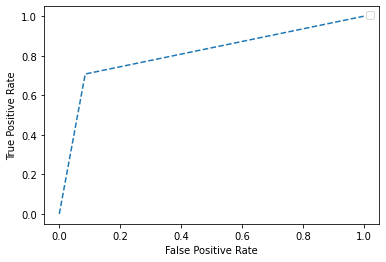

In [26]:
# plot the roc curve for the model
plt.plot(fpr, tpr, linestyle='--')

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

A good measure of separability implying an excellent model is an AUC near 1. When AUC is 0.5, it means model has no class separation capacity whatsoever. Given an AUC of 0.81, it means there is 81% chance that model will be able to distinguish between positive class (toxic) and negative class (non-toxic).


# Next Steps

To determine if my theory of bias due to class imbalance holds true, I will be creating a training set with equal size classes between toxic and non-toxic. In doing so, I can test my theory of imbalance.

Recall - the ability of a model to find all the relevant cases within a dataset. Recall can be thought as of a model’s ability to find all the data points of interest in a dataset - correct results of the results that SHOULD HAVE been returned

In the case of recall, when we increase the recall, we decrease the precision

Precision - the ability of a classification model to identify only the relevant data points - correct results of results returned

ROC curve?? quantify a model’s ROC curve by calculating the total Area Under the Curve (AUC), a metric which falls between 0 and 1 with a higher number indicating better classification performance. In the graph above, the AUC for the blue curve will be greater than that for the red curve, meaning the blue model is better at achieving a blend of precision and recall. A random classifier (the black line) achieves an AUC of 0.5.

# Notes

Next Round:
results for larger class - good
results for smaller class - very bad

step 1
can do exploration of results to find 
certain tokens that are mislabeled to see ones that are shifting precisio recall

coeff of logisitic reg
sort in 2 list - 1) coeff w/ large abs val (pos) - toxic, 2) coeff w/ large abs val (neg) - non toxic

2)
in training set, have dist of toxic/non-toxic
- take random sample of non-toxic training that is same size of toxic then run logistic regression training on it


techniques aimed at imbalance logistic regressions
- post baseline